In [1]:
import numpy as np                       # mathematical methods
from scipy import stats                  # statistical methods
from matplotlib import pyplot as plt     # plotting methods
%matplotlib inline

# Wahrscheinlichkeitstheorie

### Zufallsvariable und Wahrscheinlichkeitsraum
### Erwartungswert und Varianz
### Diskrete Zufallsvariablen und Wahrscheinlichkeitsverteilungen
### Kontinuierliche Zufallsvariable und Wahrscheinlichkeitsverteilungen
#### Zusammengesetzte kontinuierliche Verteilungen
### <span style="color:blue">Sätze der Statistik</span>


## (Wiederholung) Summe mehrerer *i.i.d.* Zufallsvariablen
Die Summe $S_n$ ist eine Zufallsvariable 
$$S_n = \sum_{i=1}^n X_i$$

### Erwartungswert
$$\mathcal{E}\bigl(\sum_{i=1}^n X_i\bigr) = \sum_{i=1}^n \mathcal{E}(X_i) =  \sum_{i=1}^n \mu = n\cdot \mu$$

### Varianz
$$\mathrm{Var}\bigl(\sum_{i=1}^n X_i\bigr)  = \sum_{i=1}^n \mathrm{Var}(X_i) = \sum_{i=1}^n \sigma^2 = n \cdot \sigma^2$$

## (Wiederholung) Mittelwert mehrerer *i.i.d.* Zufallsvariablen
Das arithemetische Mittel oder der durchschnittliche Wert von $X$ nach $n$ Versuchen ist eine Zufallsvariable
$$\overline{X_n} = \frac{1}{n}\sum_{i=1}^n X_i$$

### Erwartungswert
$$\mathcal{E}(\overline{X_n}) = \mu$$
### Varianz
$$\mathrm{Var}(\overline{X_n}) = \frac{1}{n}\sigma^2$$


expectation value         is  0.00000 and variance is  1.33333
After n=   5 samples mean is -0.20689 and variance is  0.18172
After n=  10 samples mean is -0.28676 and variance is  0.09550
After n= 100 samples mean is -0.04933 and variance is  0.01145
After n=1000 samples mean is -0.01287 and variance is  0.00135
After n=8000 samples mean is  0.00444 and variance is  0.00016


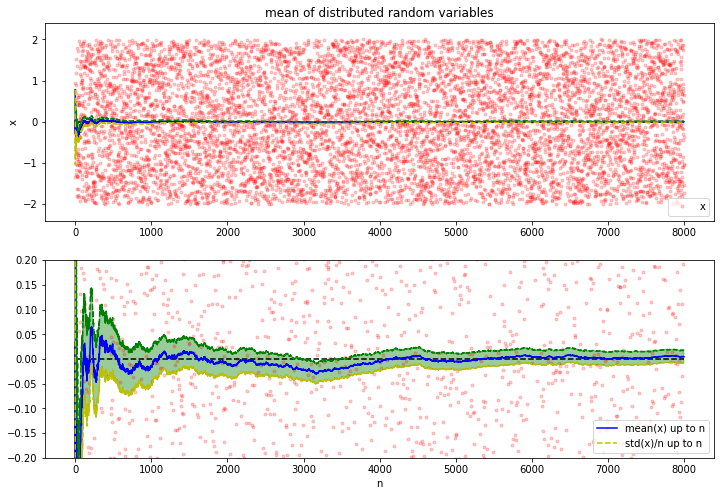

In [9]:
'''progress of mean and variance for growing n
   for example: uniform distribution
'''
N = 8000                                      # samples to draw
A = 2.4                                       # plot x = {-A..A}
np.random.seed(98765432)                      # fix random
# distrib = stats.norm(loc=0., scale=1.)      # standard normal distribution N(0, 1)
distrib = stats.uniform(loc=-2., scale=4.)    # uniform distribution -2..+2
print('expectation value         is {:8.5f} and variance is {:8.5f}'
                                    .format(distrib.expect(), distrib.var()))
x = distrib.rvs(N)                            # draw x values according distribution
n = np.arange(N)                              # n for x-axis; means of x until n
m = np.asarray([x[:i+1].mean() for i in n])   # mean for 0..n each
v = np.asarray([x[:i+1].var() for i in n])    # variance for 0..n each
for ni in (5, 10, 100, 1000, N):
    print('After n={:4d} samples mean is {:8.5f} and variance is {:8.5f}'
                                    .format(ni, m[ni-1], v[ni-1]/ni))

'''progress of mean and variance (std) for growing n; for example: uniform distribution'''
f = plt.figure(figsize=(12,8))
A = 2.4                                       # plot x = {-A..A}
f.add_subplot(211)                            # --- upper graph of 2: full size
plt.ylim(-A, A)
plt.plot(n, x, 'r.', alpha=.2, label='x')     # values of drawn samples
plt.plot([0,N], 2*[distrib.mean()], 'k--')    # dashed line for expectation value
plt.plot(n, m, 'b-')                          # the means up to i
plt.plot(n, m+np.sqrt(v/(n+1)), 'g--')        # +/- the standard deviations up to i
plt.plot(n, m-np.sqrt(v/(n+1)), 'y--')
plt.ylabel('x')
plt.title('mean of distributed random variables')
plt.legend(loc='lower right');

f.add_subplot(212)                            # --- lower graph of 2: detail 
A = 0.2                                       # plot x = {-A..A}
plt.ylim(-A, A)
plt.plot(n, x, 'r.', alpha=.2)                # values of drawn samples as scatter at position n
plt.plot([0,N], 2*[distrib.mean()], 'k--')    # dashed line for expectation value
plt.plot(n, m, 'b-', label='mean(x) up to n') # the means up to i
plt.plot(n, m+np.sqrt(v/(n+1)), 'g--')        # +/- the standard deviations up to i
plt.plot(n, m-np.sqrt(v/(n+1)), 'y--', label='std(x)/n up to n')
plt.xlabel('n')                               # v-- and the std-dev around the mean 
plt.fill_between(n, m-np.sqrt(v/(n+1)), m+np.sqrt(v/(n+1)), color='g', alpha=0.4)
plt.legend(loc='lower right');

# Gesetz der großen Zahlen

Das arithmetische Mittel $\overline{X_n} = \frac{1}{n}\sum_{i=1}^n X_i$  konvergiert *nach Wahrscheinlichkeit* gegen den Erwartungswert $\mathcal{E}(\overline{X_n}) = \mathcal{E}(X)=\mu$:

Für eine beliebig kleine Konstante $c>0$ gilt
$$P(|\overline{X}_n-\mu|\leq c) \;\xrightarrow{n\rightarrow\infty}\; 1$$

#### Beweis
Mit Hilfe der **Ungleichung von Tschebyscheff**
$$P(|\tilde{X}-\tilde{\mu}|< c) \geq 1-\frac{\tilde{\sigma}^2}{c^2}$$
und $\;\tilde{X}=\overline{X}_n\;$ sowie $\;\tilde{\sigma}^2=\frac{\sigma^2}{n}\;\xrightarrow{n\rightarrow\infty}\; 0$

# Theorem von Bernoulli
Sei $X$ eine diskrete Zufallsvariable mit möglichen Ereignissen $x_j$ mit Wahrscheinlichkeit $p_j=p(X\!=\!x_j)$. 

Dann gilt für die relative Häufigkeit $h_j$, mit der das Ereignis $x_j$ eintritt:

$$h_j \;\xrightarrow{n\rightarrow\infty}\; p(X\!=\!x_j)$$ 

In [2]:
'''Bernoulli theoreme for discrete random variables
   one die, N repetitions, only "6" counts as a win'''
np.random.seed(98765)
Ns = (100, 1000, 10000, 100000)
for N in Ns:
    x = [np.random.choice([1, 2, 3, 4, 5, 6]) for _ in range(N)]
    sixs = x.count(6)
    print('in {:6d} throws, "six" appeared {:6d} times = {:8.3f}% = (16.666{:+6.3f})%'
          .format(N, sixs, 100*sixs/N, 100*(sixs/N-1/6)))

in    100 throws, "six" appeared     18 times =   18.000% = (16.666+1.333)%
in   1000 throws, "six" appeared    154 times =   15.400% = (16.666-1.267)%
in  10000 throws, "six" appeared   1703 times =   17.030% = (16.666+0.363)%
in 100000 throws, "six" appeared  16824 times =   16.824% = (16.666+0.157)%


# Hauptsatz der Statistik, Satz von Gliwenko-Cantelli

Sei $X$ eine Zufallsvariable mit Verteilungsfunktion $F(x)$ <br>
und $\{X_i\}$ mit $i\in\{1\dots N\}$ *i.i.d.* Wiederholungen. 

Dann konvergiert die relative Häufigkeit $F_n(x)$, daß $X_i\leq x$ gegen $F(x)$ nach Wahrscheinlichkeit:
<br>

$$P(sup|F_n(x)-F(x)|\leq c) \;\xrightarrow{n\rightarrow\infty}\;1$$

for N=  20 sup(F-Fn)=  0.21750
for N= 100 sup(F-Fn)=  0.07500
for N=1000 sup(F-Fn)=  0.01550


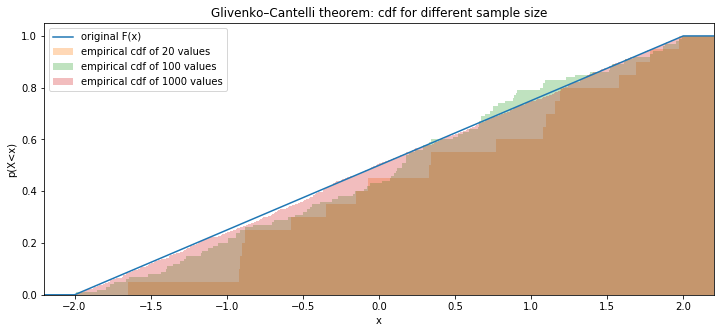

In [3]:
'''Glivenko–Cantelli theorem: cdf for different sample size'''
np.random.seed(98765)
f = plt.figure(figsize=(12,5))
x = np.linspace(-3, 3, 601)
distrib = stats.uniform(loc=-2, scale=4.)
F = distrib.cdf(x)
plt.plot(x, F, label='original F(x)')
bins = np.linspace(-3, 3.01, 602)
for N in (20, 100, 1000):
    Xi = distrib.rvs(size=N) 
    h = plt.hist(Xi, bins=bins, cumulative=True, density=True, edgecolor="none", 
             alpha=.3, label='empirical cdf of {} values'.format(N));
    sup = np.abs(F-h[0]).max()
    print('for N={:4d} sup(F-Fn)={:9.5f}'.format(N, sup))
plt.axis((-2.2, 2.2, 0, 1.05))
plt.legend(loc='upper left')
plt.xlabel('x')
plt.ylabel('p(X<x)')
plt.title('Glivenko–Cantelli theorem: cdf for different sample size');

In [13]:
plt.hist?

----

### Mittelwert
Sei $X$ eine Zufallsvariable mit Erwartungswert $\mu$ und Varianz $\sigma^2$.

Die Zufallsvariable *Mittelwert* mehrere *i.i.d* $X_i$
$$M_n = \frac{1}{n}\sum_{i=1}^n X_i$$
hat den Erwartungswert
$$\mu_M = \mathcal{E}\bigl(M_n\bigr) = \mu$$
und die Varianz
$$\sigma^2_M = \mathrm{Var}\bigl(M_n\bigr) = \frac{1}{n}\cdot \sigma^2$$

Standardisieren ergibt eine neue Zufallsvariable $Z_n$
$$Z_n = \frac{M_n-\mu_M}{\sigma_M} = \frac{\frac{1}{n}\sum_{i=1}^n X_i -\frac{n}{n}\mu}{\frac{1}{\sqrt{n}}\sigma} = \frac{\sum_{i=1}^n (X_i-\mu)}{\sqrt{n}\cdot\sigma}$$

# Zentraler Grenzwertsatz

Seien $X_i$ unabhängig identisch verteilte Zufallsvariablen mit Erwartungswert
$$\mathcal{E}(X_i) = \mu$$
und Varianz
$$\mathrm{Var}(X_i) = \sigma^2$$
Dann konvergiert die Verteilungsfunktion 
$$F_n(z)=P(Z_n\leq z)$$
der standardisierten Summe
<div class="alert alert-block alert-success">
$$Z_n = \frac{1}{\sqrt{n}}\sum_{i=1}^n\frac{X_i-\mu}{\sigma}$$
</div>

für $n\rightarrow\infty$ an jeder Stelle $z\in\mathbb{R}$ gegen die Verteilungsfunktion der **Standardnormalverteilung**

$$F_n(z)\;\xrightarrow{n\rightarrow\infty}\;\Phi(z)$$
Kurz:
<div class="alert alert-block alert-success">
$$Z_n \stackrel{a}{\sim} \mathcal{N}(0, 1)$$
</div>

## Zentraler Grenzwertsatz: Beispiel Binomialverteilung

Binomialverteilte Zufallsvariable $X \sim \mathcal{B}(N, \pi)$ mit $N=10$ und $\pi=\frac{1}{2}$
#### Kennwerte
$$\mathcal{E}(X) = \mu_B = N\cdot\pi \quad = 5$$
$$\mathrm{Var}(X) = \sigma_B^2  =N\cdot\pi\cdot (1-\pi) = 2,5$$
$$Std(X) = \sqrt{\mathrm{Var}(X)} = \sqrt{\frac{5}{2}} \approx 1,6$$

#### Ein Versuch
$n=100$ malige Durchführung des Zufallsexperiments $X_i$ mit $i\in\{1\dots n\}$
ergibt den Mittelwert 
$$\overline{X}_n = \frac{1}{n}\sum_{i=1}^n x_i$$

#### Erwartungswert von $\overline{X}_n$
$$\mu_n = \mathcal{E}(\overline{X}_n) = \frac{n}{n}\mathcal{E}(X)  = \mu_B = N\cdot \pi = 10\cdot \frac{1}{2} = 5$$

#### Varianz von $\overline{X}_n$
$$\sigma_n^2 = \mathrm{Var}(\overline{X}_n) = \frac{n\cdot \mathrm{Var}(X)}{n^2} = \frac{\sigma^2}{n}  = \frac{N\cdot\pi\cdot (1-\pi)}{n} = 0.025$$
Standardabweichung
$$\sigma_n = \sqrt{\mathrm{Var}(\overline{X}_n)} \approx 0,16$$


#### Standardisieren
$$Z_n = \frac{\overline{X}_n-\mu_n}{\sigma_n} = \sqrt{n}\frac{\overline{X}_n-\mu_B}{\sigma_B}$$

#### Mehrfache Durchführung
*rep*-malige Wiederholung dieses Versuchs ergibt eine (empirische) Verteilung der $Z_n$

#### Zentraler Grenzwertsatz
für die Verteilung (aus der Theorie) der $Z_n$ 
$$Z_n \sim \mathcal{N}(0,1)$$

## Zentraler Grenzwertsatz: Beispiel Binomialverteilung

X_  1 has mean=4.965 and var=2.64377
X_  4 has mean=5.008 and var=0.62057
X_ 16 has mean=5.021 and var=0.18809
X_ 64 has mean=5.004 and var=0.04315
X_256 has mean=5.012 and var=0.01170
standardized probability distribution of random variable X:


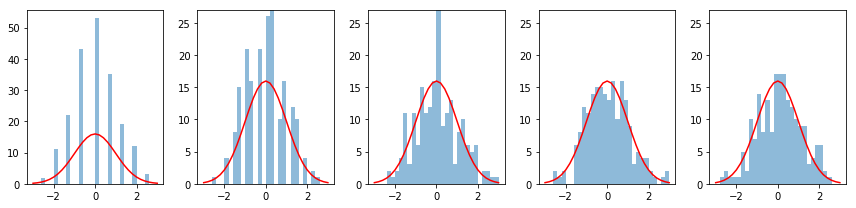

In [4]:
'''central limit theoreme - binomial distribution'''
nplots = 5
ns = [4**i for i in range(nplots)]         # size of sums = {1, 4, 16, 64, 256}
np.random.seed(9876543)
rep = 200                                  # number of repetitions to get x-sum-distribution
binoN, binoPi = (10, 0.5)                  # N and pi of binomial distributions
# ... resulting in characteristics mean and var
binoMu, binoVar = (binoN*binoPi, binoN*binoPi*(1-binoPi))
bins = np.linspace(-3.0, 3.0, 31)          # bins for histogram plotting
factor = rep*(bins[-1]-bins[0])/(bins.shape[0]-1)   # 
f = plt.figure(figsize=(12,3))
distrib = stats.binom(binoN, binoPi)       # Starter: of distribution binomial(N=10, pi=0.5)
for i, n in enumerate(ns):
    X = distrib.rvs(size=(rep, n))         # draw n times rep values of distribution
    means = X.mean(axis=1)                 # the rep=200 means of Xi with i=1..n 
    Z = np.sqrt(n) * (means-binoMu) / np.sqrt(binoVar)  # standardize distribution
    f.add_subplot(1,nplots,i+1)
    plt.hist(Z, bins=bins, edgecolor="none", alpha=.5)
    if i>0:
        plt.ylim(0, 27)
    plt.plot(bins, factor*stats.norm.pdf(bins), 'r-');
    print('X_{:3d} has mean={:.3f} and var={:.5f}'.format(n, means.mean(), means.var()))
plt.tight_layout()
print('standardized probability distribution of random variable X:')

## Zentraler Grenzwertsatz: Beispiel Gleichverteilung

X_  1 has mean= 0.037 and var=0.72586
X_  4 has mean=-0.021 and var=0.17273
X_ 16 has mean= 0.006 and var=0.05273
X_ 64 has mean= 0.008 and var=0.01135
X_256 has mean= 0.009 and var=0.00296
standardized probability distribution of random variable X:


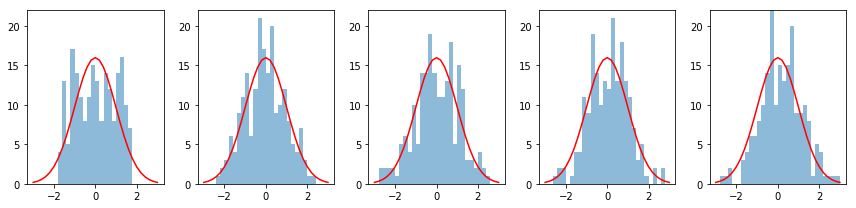

In [5]:
'''central limit theoreme - uniform distribution'''
nplots = 5
ns = [4**i for i in range(nplots)]         # size of sums = {1, 4, 16, 64, 256}
np.random.seed(98765432)
rep = 200                        # number of repetitions to get x-sum-distribution
unia, unib = (-1.5, 1.5)         # a..b of uniform distributions
bins = np.linspace(-3.0, 3.0, 31)# bins for histogram plotting
factor = rep*(bins[-1]-bins[0])/(bins.shape[0]-1)
f = plt.figure(figsize=(12,3))
distrib = stats.uniform(loc=unia, scale=unib-unia) # distribution uniform a..b
# ... results in characteristic mean and var
uniMu, uniVar = (distrib.expect(), distrib.var())
for i, n in enumerate(ns):
    X = distrib.rvs(size=(rep, n))              # draw n times rep values of distribution
    means = X.mean(axis=1)                      # the rep=200 means of Xi with i=1..n 
    Z = np.sqrt(n)*(means-uniMu)/np.sqrt(uniVar)# standardize distribution
    f.add_subplot(1,nplots,i+1)
    plt.hist(Z, bins=bins, edgecolor="none", alpha=.5)
    plt.ylim(0, 22)
    plt.plot(bins, factor*stats.norm.pdf(bins), 'r-');
    print('X_{:3d} has mean={:6.3f} and var={:.5f}'
                                  .format(n, means.mean(), means.var()))
plt.tight_layout()
print('standardized probability distribution of random variable X:')

## Zentraler Grenzwertsatz: Beispiel Normalverteilung

X_  1 has mean=1.206 and var=3.96231
X_  4 has mean=1.452 and var=1.05583
X_ 16 has mean=1.468 and var=0.20611
X_ 64 has mean=1.486 and var=0.06509
X_256 has mean=1.501 and var=0.01527
standardized probability distribution of random variable X:


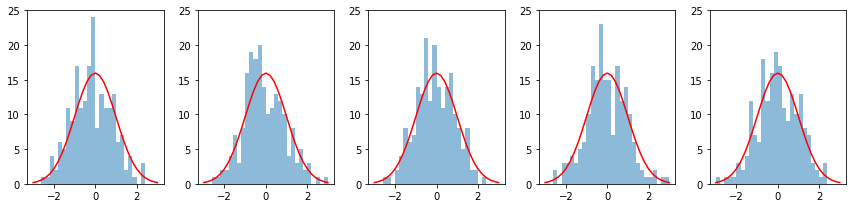

In [6]:
'''central limit theoreme - Normal distribution'''
nplots = 5
ns = [4**i for i in range(nplots)]    # size of sums = {1, 4, 16, 64, 256}
np.random.seed(9876543)
rep = 200                             # number of repetitions to get x-sum-distribution
mu, sigma = 1.5, 2                    # mu, sigma of a Gaussian normal distributions
bins = np.linspace(-3.0, 3.0, 31)     # bins for histogram plotting
factor = rep*(bins[-1]-bins[0])/(bins.shape[0]-1)
f = plt.figure(figsize=(12,3))
distrib = stats.norm(loc=mu, scale=sigma) # Gaussian distribution (mu, sigma)
for i, n in enumerate(ns):
    X = distrib.rvs(size=(rep, n))    # draw n times rep values of distribution
    means = X.mean(axis=1)            # the rep=200 means of Xi with i=1..n 
    Z = np.sqrt(n)*(means-mu) / sigma # standardize distribution
    f.add_subplot(1,nplots,i+1)
    plt.hist(Z, bins=bins, edgecolor="none", alpha=.5)
    plt.ylim(0, 25)
    plt.plot(bins, factor*stats.norm.pdf(bins), 'r-');
    print('X_{:3d} has mean={:.3f} and var={:.5f}'
                                  .format(n, means.mean(), means.var()))
plt.tight_layout()
print('standardized probability distribution of random variable X:')

## Zentraler Grenzwertsatz für beliebige Mischungen

sinus    has mean= 0.000 and std= 0.997
triangle has mean=-0.083 and std= 0.988
square   has mean=-0.002 and std= 1.000
mixture  has mean=-0.049 and std= 0.915


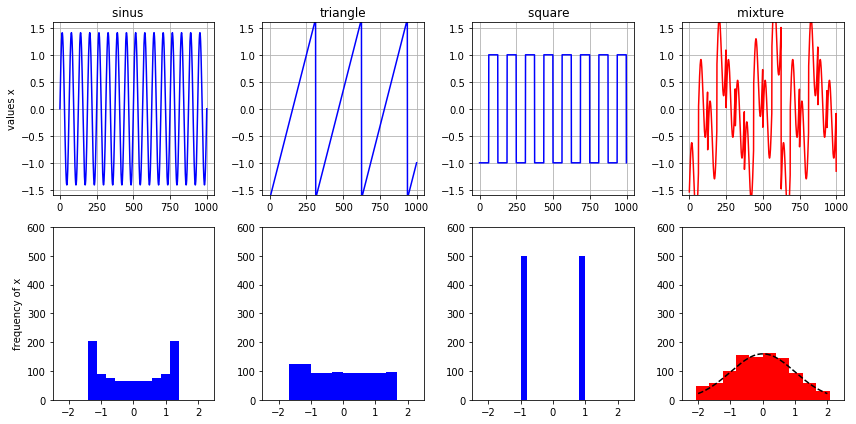

In [7]:
'''central limit theoreme - even for non i.i.d. mixtures - but many'''
x = np.linspace(0, 16, 1000)
f = plt.figure(figsize=(12, 6))
sinus = 1.41*np.sin(2.*np.pi*x)                    # sine wave distribution
triangle=(x%5-2.5)/1.5                             # sawtooth distribution
square = 2*((x%2)>1.0)-1.                          # rectangular distribution
mixture=1./np.sqrt(3)*(sinus+triangle+square)      # normalize
cols = ['b', 'b', 'b', 'r']                        # colors for plotting
names = ['sinus   ', 'triangle', 'square  ', 'mixture ']
for i, curve in enumerate([sinus, triangle, square, mixture]):
    f.add_subplot(2, 4, 1+i)                       # i_th plot upper row
    plt.title(names[i])
    plt.grid(True)
    plt.plot(curve, cols[i])                       # plot of i-th curve
    plt.ylim(-1.6, 1.6)
    if i==0:
        plt.ylabel('values x')
    f.add_subplot(2, 4, 5+i)                       # i_th plot lower row
    #plt.title(names[i]+' histogram')
    plt.axis((-2.5, 2.5, 0, 600))
    plt.hist(curve, color=cols[i])                 # histogram of i-th curve
    print('{} has mean={:6.3f} and std={:6.3f}'
                              .format(names[i], curve.mean(), curve.std()))
    if i==0:
        plt.ylabel('frequency of x')  
x = np.linspace(-2, 2, 401)
# and for comparison of mixture: add standard normal to last plot
plt.plot(x, 400*stats.norm.pdf(x), 'k--')
plt.tight_layout();

### Zentraler Grenzwertsatz gilt näherungsweise auch für 
- unabhängig summierte Ursachen
    - zwar non i.i.d.
    - aber gleiche Größenordnung der Streuung $\sigma_i$

Beispiele: 
- Körpergröße beeinflußt durch Genetik: mehrer Wachstumsschübe
- Rauschen in einer Anlage durch viele Komponenten
- Meßfehler, die mehrere unabhängige Ursachen haben
- Verhalten von Populationen

# Zusammenfassung

- Zufallsvariable mit stetiger Wahrscheinlichkeitsverteilung
    - $x \in \mathbb{R}$
- Wahrscheinlichkeitsdichte $f(x)$
    - Punktwahrscheinlichkeit $\rightarrow 0$
$$P(a\leq x \leq b) =  \int_{a}^{b} f(x)\,\mathrm{d}x = F(b)-F(a)\;\leq 1$$    
    - subjektiv "ars conjectandi" (Theorie, Interpretation) 
    - Normierung $1$
    - Verteilungsfunktion $F(x)$
- Kennzahlen
    - Erwartungswert
$$\mathcal{E}(X) = \mu = \int_{-\infty}^{\infty} x\cdot f(x)\, \mathrm{d}x$$
    - Varianz
$$\mathrm{Var}(X) = \sigma^2 = \int_{-\infty}^{\infty} (x-\mu)^2\cdot f(x) \,\mathrm{d}x = \mathcal{E}((X-\mu)^2)$$    
    - Schiefe und Kurtosis
    - Kovarianz

# ...
- Stetige Verteilungen
    - Normalverteilung
    - Standardnormalverteilung
$$\phi(x) = \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}$$
    - Exponentialverteilung
$$f(x) = \lambda e^{-\lambda x}\qquad x\geq 0$$    
    - Pareto-Verteilung
    - Cauchy/Lorentz-Verteilung
$$Y = \frac{X_1}{X_2} \; \rightarrow \; Y\sim\mathcal{Cauchy}$$
    - Quadrat-Verteilung $X^2$
- Zusammengesetzte Verteilungen
    - Summe von Zufallsvariablen
    - Mittelwert von Zufallsvariablen

# ...
- Satz von Bernoulli
$$h_j \rightarrow p(X=x_j)$$ 
- Hauptsatz der Statistik
$$F_n(x) \rightarrow F(x)$$
- Gesetz der großen Zahlen
$$\overline{X}_n \rightarrow \mu$$
- Zentraler Grenzwertsatz
$$F_n(z)\rightarrow\Phi(z)$$

# Ausblick
- $\chi^2$ -Verteilung
- Student-$t$ -Verteilung

# Fragen?